In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy

In [11]:
filename = 'Polarization/tek0012ALL.csv'  # changed this to collect all the data from all the files

time, spectrum = np.loadtxt(filename, delimiter=',', skiprows=21, unpack=True)

In [12]:
mean = np.mean(spectrum)
std = np.std(spectrum)

print(f"Voltage is {mean} +- {std}")

Voltage is 0.9320400000000001 +- 0.02102946504312458


In [13]:
# Manually added from all the files
x = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330 ,360]
y = [0.79652,1.04064,0.86772,0.48692,0.23416,0.38724,0.8192,1.097,0.94108,0.519,0.31216,0.48984,0.93204]
uy = [0.02181489,0.02006964,0.02126973,0.01914454,0.02073389,0.0219541,0.02261327,0.02249889,0.02224486,0.02001499,0.02006326,0.02053228,0.02102947]
print(len(x), len(y))

13 13


In [14]:
# Convert for data analysis
x = np.array(x) * np.pi/180  # convert to radian
ux = 0.5 * np.pi/180 * np.ones(len(x))
y = np.array(y)  # volts
uy = np.array(uy)  # volts

continuous_x = np.linspace(x[0], x[-1], 500)

In [15]:
# fit function
def polarization(x, Amplitude, phase, b):
    return Amplitude * np.cos(x + phase)**2 + b

<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_82068/2302253291.py:26: SyntaxWarning: invalid escape sequence '\c'
  f"$\chi^2 = {chisq:.2f}$\n")


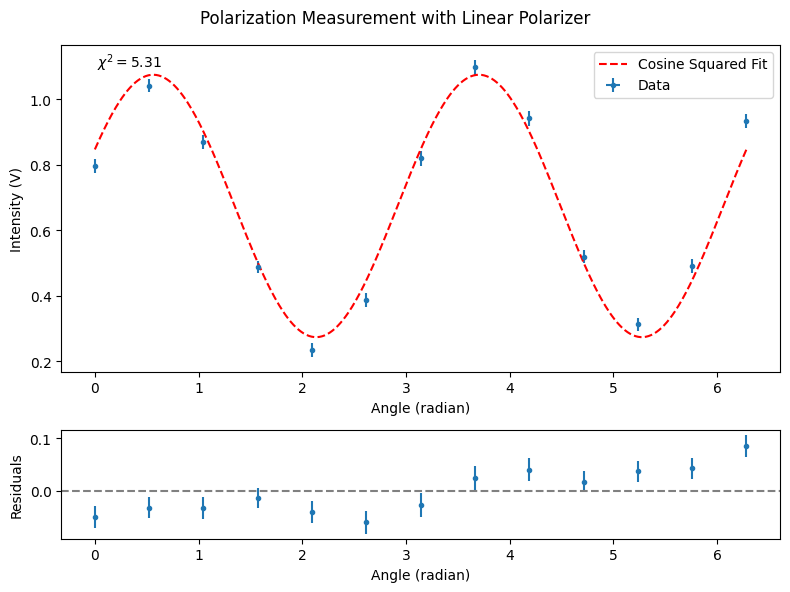

Fitted parameters:
 I0=0.8008210631189635 +- 0.03889490068559878 
 x0=-0.5627682615206362 +- 0.023334075409922418
 w=0.27319701448327804 +- 0.03889490068559878


In [16]:
# Curve Fit

popt, pcov = curve_fit(polarization, x, y, p0=[0.5, 0, 0], sigma=uy)

uncertainty = np.sqrt(np.diag(pcov))
dof = len(x) - len(popt)

chisq = np.sum(((y-polarization(x,*popt))/uy)**2) / dof
cdf = scipy.special.chdtrc(dof,chisq)

residuals = y - polarization(x, *popt)

# Create figure with two subplots: main plot and residuals plot
fig, ax = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle("Polarization Measurement with Linear Polarizer")

# Main plot with data and fit
ax[0].errorbar(x, y, xerr=ux, yerr=uy, label='Data', fmt='.')
ax[0].plot(continuous_x, polarization(continuous_x, *popt), 'r--', label='Cosine Squared Fit')
ax[0].set_xlabel('Angle (radian)')
ax[0].set_ylabel('Intensity (V)')
ax[0].legend()


fit_info_text = (
f"$\chi^2 = {chisq:.2f}$\n")

# Annotate on the plot
ax[0].text(0.05, 0.98, fit_info_text, 
        transform=ax[0].transAxes, verticalalignment='top')


# Residuals plot
ax[1].errorbar(x, residuals, xerr=ux, yerr=uy ,label='Residuals', fmt='.')
ax[1].axhline(0, color='gray', linestyle='--')  # Horizontal line at 0
ax[1].set_xlabel('Angle (radian)')
ax[1].set_ylabel('Residuals')

# Show the plot
plt.tight_layout()
plt.savefig("Polarization.png")
plt.show()

print(f"Fitted parameters:\n I0={popt[0]} +- {uncertainty[0]} \n x0={popt[1]} +- {uncertainty[1]}")
print(f" w={popt[2]} +- {uncertainty[0]}")